In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

max_date = session.query(func.max(func.date(measurement.date))).scalar()
max_date

'2017-08-23'

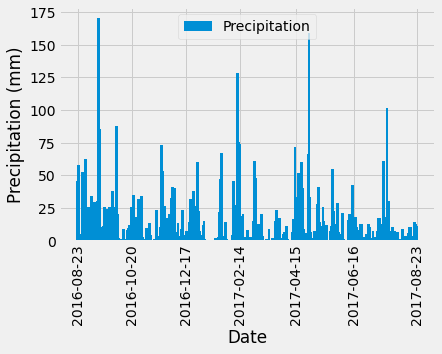

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
precipitation_scores = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= query_date).all()
precipitation_df = pd.DataFrame(precipitation_scores, columns=['Date', 'Precipitation']).sort_values('Date')
precipitation_df['Precipitation'].fillna(0, inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
n = precipitation_df.shape[0]
step = n // 6
plt.bar(precipitation_df['Date'], precipitation_df['Precipitation'], width=3, label = 'Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend(loc = 'upper center')
plt.xticks(rotation=90, ticks = precipitation_df['Date'][::step])
plt.show()

In [11]:
precipitation_scores

[('2016-08-23', 0.0),
 ('2016-08-24', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.3),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 3.3),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.8),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 1.3),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.8),
 ('2016-09-10', 0.0),
 ('2016-09-11', 1.3),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.5),
 ('2016-09-14', 33.5),
 ('2016-09-15', 10.7),
 ('2016-09-16', 1.5),
 ('2016-09-17', 1.3),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.5),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 1.5),
 ('2016-09-27', 0.5),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('201

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe().round(2)

,Precipitation
count,2230.00
mean,4.08
std,11.23
min,0.00
25%,0.00
50%,0.30
75%,2.80
max,170.20


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(measurement.station).group_by(measurement.station).count()

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_count = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
USC00519281_min = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == station_count[0][0]).scalar()
USC00519281_max = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == station_count[0][0]).scalar()
USC00519281_mean = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == station_count[0][0]).scalar()

print(f"Most Active Station: {station_count[0][0]}")
print(f"Lowest Temperature: {USC00519281_min}")
print(f"Highest Temperature: {USC00519281_max}")
print(f"Average Temperature: {USC00519281_mean}")

Most Active Station: USC00519281
Lowest Temperature: 12.2
Highest Temperature: 29.4
Average Temperature: 22.03582251082252


In [16]:
max_date = session.query(func.max(func.date(measurement.date))).\
    filter(measurement.station == station_count[0][0]).scalar()
max_date

'2017-08-18'

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_date = session.query(func.max(measurement.date)).\
    filter(measurement.station == station_count[0][0]).scalar()
last_date

'2017-08-18'

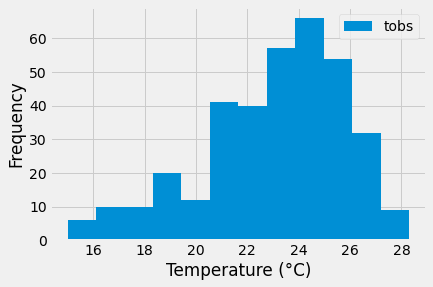

In [22]:
one_year_ago = dt.date(2017, 8, 18) - dt.timedelta(days=365)
results = session.query(measurement.tobs).\
    filter(measurement.station == station_count[0][0], measurement.date >= one_year_ago).all()
temperatures = [result[0] for result in results]

plt.hist(temperatures, bins=12, label = 'tobs')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.show()

# Close session

In [18]:
# Close Session
session.close()